<div style="padding:10px; 
            color:#FF9F00;
            margin:10px;
            font-size:150%;
            display:fill;
            border-radius:1px;
            border-style: solid;
            border-color:#FF9F00;
            background-color:#3E3D53;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b>Table of Contents</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="#1">1 - Overview and What are Transformers</a>
        </li>
        <li>
            <a href="#2">2 - Preprocessing The Data</a>
            <ul>
                <li>
                    <a href="#2-1">2.1 - Loading Dataset</a>
                </li>
                <li>
                    <a href="#2-2">2.2 - Visualization</a>
                </li>
                <li>
                    <a href="#2-3">2.3 - Tokenization</a>
                </li>
                <li>
                    <a href="#2-4">2.4 - Padding</a>
                </li>
            </ul>
        </li>
        <li>
            <a href="#3">3 - Helper Functions</a>
            <ul>
                <li>
                    <a href="#3-1">3.1 - Positional Encodings</a>
                </li>
                <li>
                    <a href="#3-2">3.2 - Masking</a>
                </li>
            </ul>
        </li>
        <li>
            <a href="#4">4 - Model Implementation</a>
            <ul>
                <li>
                    <a href="#4-1">4.1 - Attention</a>
                </li>
                <li>
                    <a href="#4-2">4.2 - MultiHeadAttention Layer</a>
                </li>
                <li>
                    <a href="#4-3">4.3 - Fully Connect Layer</a>
                </li>
                <li>
                    <a href="#4-4">4.4 - Encoder</a>
                </li>
                <li>
                    <a href="#4-5">4.5 - Decoder</a>
                </li>
                <li>
                    <a href="#4-6">4.6 - Transformer</a>
                </li>
            </ul>
        </li>
        <li>
            <a href="#5">5 - Training</a>
            <ul>
                <li>
                    <a href="#5-1">5.1 - Initializing hyperparameters</a>
                </li>
                <li>
                    <a href="#5-2">5.2 - Learning Rate Scheduler</a>
                </li>
                <li>
                    <a href="#5-3">5.3 - Loss function and Metrics</a>
                </li>
                <li>
                    <a href="#5-4">5.4 - Training Function</a>
                </li>
                <li>
                    <a href="#5-5">5.5 - Training Loop</a>
                </li>
            </ul>
        </li>
        <li>
            <a href="#6">6 - Evaluation</a>
            <ul>
                <li>
                    <a href="#6-1">6.1 - Translation Helper Function</a>
                </li>
                <li>
                    <a href="#6-2">6.2 - Translation Function</a>
                </li>
            </ul>
        </li>
        <li>
            <a href="#7">7 - Thank you and References</a>
        </li>
    </ul>
</div>


<a id="1"></a>
<h1 style='background:#FF9F00;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #3E3D53;'>Overview</center></h1>
    
# Overview



    
**Transformers are a powerful type of neural network architecture that have revolutionized natural language processing (NLP) and other sequence-to-sequence tasks. They are used for a variety of applications, including machine translation, text summarization, and language modeling.**

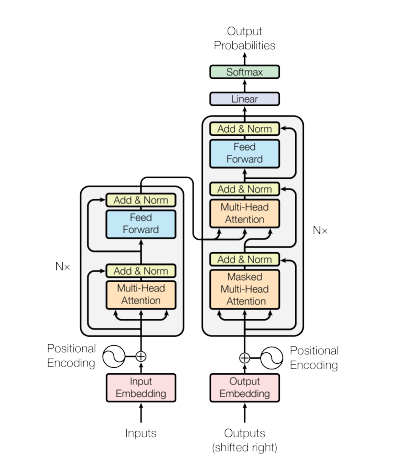

**One of the key innovations of transformers is their ability to process entire sequences of data in parallel, instead of relying on a recurrent approach that processes data one step at a time. This is achieved through the use of self-attention mechanisms, which allow the model to selectively focus on different parts of the input sequence as it processes the data.**

**In this tutorial, we will provide a detailed overview of transformers, starting with an explanation of how they work and what makes them unique. We will then walk through a step-by-step guide on how to implement a transformer model in Python, using the TensorFlow deep learning library.**

**We will cover topics such as preprocessing data, implementing the transformer model architecture, training the model, and evaluating its performance on a machine translation task. By the end of this tutorial, you should have a solid understanding of how transformers work and how to use them to build powerful NLP models.**
    


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os 

from wordcloud import WordCloud
from tensorflow.python.ops.numpy_ops import np_config
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Input, Dropout, LayerNormalization

np_config.enable_numpy_behavior()

<a id="2"></a>
<h1 style='background:#FF9F00;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #3E3D53;'>Preprocessing The Data</center></h1>
    
 # Preprocessing The Data

## Loading The Data <a name="2-1"></a>

In [2]:
en_df = pd.read_csv('/kaggle/input/english-to-french/small_vocab_en.csv', header=None, usecols=[0])

fr_df =  pd.read_csv('/kaggle/input/english-to-french/small_vocab_fr.csv',header=None, usecols=[0])

In [3]:
en_df.head()

,0
0,new jersey is sometimes quiet during autumn
1,the united states is usually chilly during july
2,california is usually quiet during march
3,the united states is sometimes mild during june
4,your least liked fruit is the grape


In [4]:
fr_df.head()

,0
0,new jersey est parfois calme pendant l' automne
1,les états-unis est généralement froid en juillet
2,california est généralement calme en mars
3,les états-unis est parfois légère en juin
4,votre moins aimé fruit est le raisin


In [5]:
english_sentences =  en_df[0].values
french_sentences = fr_df[0].values

## Visualization <a name="2-2"></a>

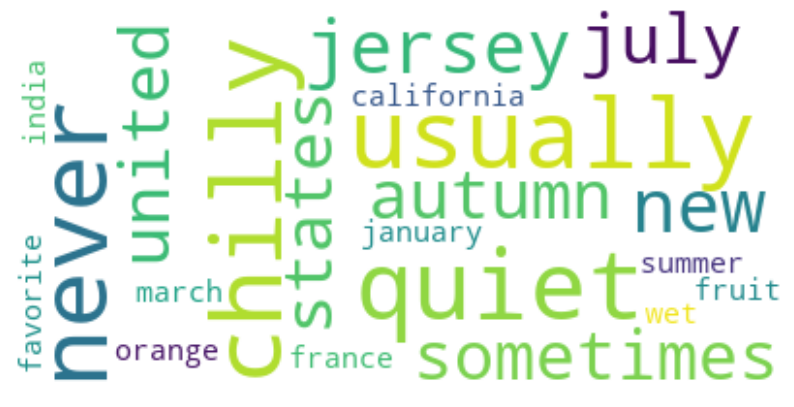

In [6]:
wordcloud = WordCloud(max_words=200, max_font_size=50, background_color='white')
wordcloud = wordcloud.generate(str(english_sentences))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

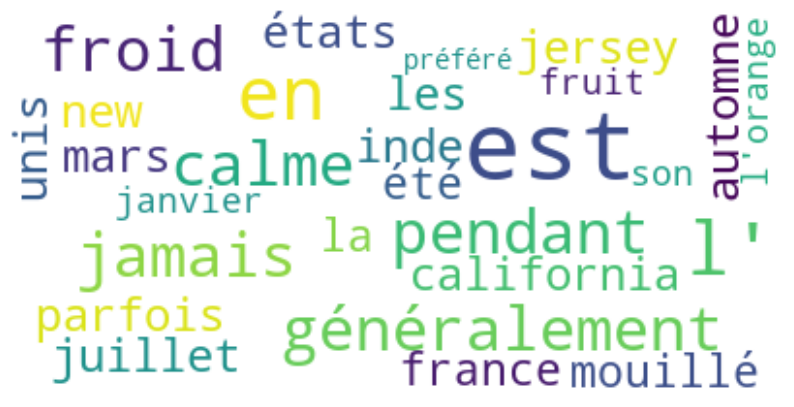

In [7]:
# generate wordcloud for english corpus
wordcloud = WordCloud(max_words=200, max_font_size=50, background_color='white')
wordcloud = wordcloud.generate(str(french_sentences))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [8]:
for i in range(len(english_sentences)):
    english_sentences[i] = "sos " + str(english_sentences[i]) + " eos."
    french_sentences[i] = "sos " + str(french_sentences[i]) + " eos."


## Tokenization <a name="2-3"></a>
**In natural language processing (NLP), tokenization is the process of breaking up text into individual units called tokens. These tokens are typically words, but they can also be phrases, subwords, or characters, depending on the application. Tokenization is a fundamental step in many NLP tasks, such as language modeling, machine translation, and text classification. Once the text has been tokenized, it can be converted into a numerical representation that can be used as input to a machine learning model**

In [9]:
num_words = 10000
tokenizer_en = Tokenizer(num_words=num_words, filters='!#$%&()*+,-/:;<=>@«»""[\\]^_`{|}~\t\n')
tokenizer_en.fit_on_texts(english_sentences)
english_sentences = tokenizer_en.texts_to_sequences(english_sentences)

word_index = tokenizer_en.word_index
print(f"The number of words in the English vocabulary: {len(word_index)}")

The number of words in the English vocabulary: 217


In [10]:
tokenizer_fr = Tokenizer(num_words=num_words, filters='!#$%&()*+,-/:;<=>@«»""[\\]^_`{|}~\t\n')
tokenizer_fr.fit_on_texts(french_sentences)
french_sentences = tokenizer_fr.texts_to_sequences(french_sentences)

word_index_fr = tokenizer_fr.word_index
print(f"The number of words in the French vocabulary: {len(word_index_fr)}")

The number of words in the French vocabulary: 339


## Padding <a name="2-4"></a>

**In machine learning models, input sequences are often required to have a fixed length. If the input sequences have different lengths, they need to be padded with some placeholder value (usually 0) so that they all have the same length. This process is called padding. Padding ensures that the inputs to the model are of the same size, which is necessary for the model to be trained efficiently.**

In [11]:
english_sentences = pad_sequences(english_sentences, maxlen = 30, padding='post', truncating='post')
french_sentences = pad_sequences(french_sentences, maxlen=30, padding='post', truncating='post')

<a id="3"></a>
<h1 style='background:#FF9F00;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #3E3D53;'>Helper Functions</center></h1>
    
# Helper Functions

## Positional Encoding   <a name="3-1"></a>

**When working with sequence to sequence tasks, the order of the data is crucial. While training RNNs, the input order is preserved automatically. However, when training Transformer networks, all data is input at once, and there's no inherent order information. To overcome this, positional encoding is used to specify the position of each input in the sequence. This encoding is achieved through sine and cosine formulas as follows:**

$$
PE_{(pos, 2i)}= sin\left(\frac{pos}{{10000}^{\frac{2i}{d}}}\right)
\tag{1}$$

<br>
$$PE_{(pos, 2i+1)}= cos\left(\frac{pos}{{10000}^{\frac{2i}{d}}}\right)
\tag{2}$$

**Here, $pos$ refers to the position of the input in the sequence, $i$ refers to the index of the dimension in the embedding vector, and $d$ refers to the dimensionality of the model.**

In [12]:
def get_angles(pos, i, embedding_dim):
    """
    Function to compute the angles for positional encoding.
    
    Returns the angle computed
    """
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(embedding_dim))
    return pos * angle_rates

In [13]:
def positional_encoding(position, embedding_dim):
    """
    Adds  positional encoding to the Embeddings to be fed to the Transformer model.
    
    Computes a sin and cos of the angles determined by the get_angles() function
    and adds the value computed to an axis of the embeddings.
    """
    angle_rads = get_angles(np.arange(position)[:, np.newaxis], 
                           np.arange(embedding_dim)[np.newaxis, :], embedding_dim)
    
    # apply sin to even indices in the array. ie 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    
    # apply cos to odd indices in the array. ie 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

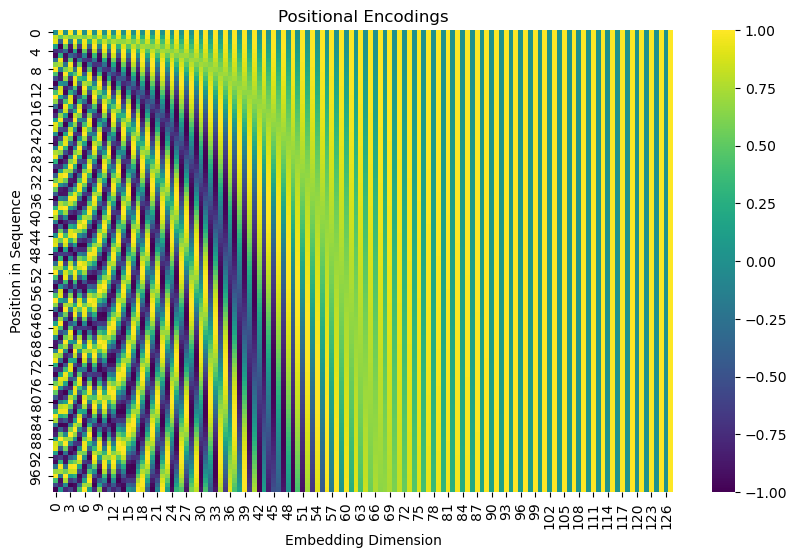

In [14]:
# Generate positional encodings
pos_encodings = positional_encoding(100, 128)

# Visualize the encodings as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pos_encodings[0], cmap='viridis')
plt.xlabel('Embedding Dimension')
plt.ylabel('Position in Sequence')
plt.title('Positional Encodings')
plt.show()


## Masking   <a name="3-2"></a>

**Sequences longer than the maximum length of five will be truncated, and zeros will be added to the truncated sequence to achieve uniform length. Similarly, for sequences shorter than the maximum length, zeros will also be added for padding. However we need to account for the impact of these zeros on the softmax calculation, which can degrade the model's performance. To handle this, the function computes a boolean mask that flags the padded elements in the sequence. The mask is then used to set all padding values to a negative infinity value (-1e9) to disregard them in the softmax calculation.**

In [15]:
def create_padding_mask(seq):
    """
    Creates a padding mask for a given sequence.
    
    Args:
        seq (tensor): A tensor of shape (batch_size, seq_len) containing the sequence.
        
    Returns:
        A tensor of shape (batch_size, 1, 1, seq_len) containing a mask that is 1 where the sequence is padded, and 0 otherwise.
    """
    # Convert the sequence to a boolean tensor where True indicates a pad token (value 0).
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    
    # Add an extra dimension to the mask to add the padding to the attention logits.
    return seq[:, tf.newaxis, tf.newaxis, :]


**The look-ahead mask follows similar intuition. In training, you will have access to the complete correct output of your training example. The look-ahead mask helps the transformer model simulate correctly predicting a portion of the output without peeking ahead. In training, the entire correct output is available, but during inference, the model must generate output one token at a time based on its previous predictions. This mask allows the model to simulate this process and see if it can correctly predict the next token without looking ahead. The function generates a lower triangular matrix of shape (size, size), with ones on the diagonal and zeros below the diagonal. This matrix is returned as a 'tf.Tensor'.**

In [16]:
def create_look_ahead_mask(size):
    """
    Creates a look-ahead mask used during training the decoder of a transformer.

    Args:
        size (int): The size of the mask.

    Returns:
        tf.Tensor: A lower triangular matrix of shape (size, size) with ones on the diagonal
            and zeros below the diagonal.
    """
    # create a matrix with ones on the diagonal and zeros below the diagonal
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    
    return mask


**The create_masks function is used to create three different masks necessary for the attention mechanism in a transformer neural network model. The three masks are the encoder padding mask, the combined mask used in the first attention block, and the decoder padding mask used in the second attention block.**

**The enc_padding_mask is a binary mask used to indicate which elements of the input sequence are padding tokens, so that the attention mechanism will ignore these elements during processing. The dec_padding_mask is the same as the enc_padding_mask, but applied to the decoder input sequence.**

**The look_ahead_mask is used to mask out future tokens during training, so that the model can only use information from tokens it has already generated to make its next prediction.**

**Finally, the dec_target_padding_mask is used to mask out padding tokens in the decoder target sequence. The combined_mask is a combination of the look_ahead_mask and the dec_target_padding_mask, used in the first attention block to ensure that the decoder only uses information from previously generated tokens and not future ones, while ignoring padding tokens.**

In [17]:
def create_masks(inputs, targets):
    """
    Creates masks for the input sequence and target sequence.
    
    Args:
        inputs: Input sequence tensor.
        targets: Target sequence tensor.
    
    Returns:
        A tuple of three masks: the encoder padding mask, the combined mask used in the first attention block, 
        and the decoder padding mask used in the second attention block.
    """
    
    # Create the encoder padding mask.
    enc_padding_mask = create_padding_mask(inputs)
        
    # Create the decoder padding mask.
    dec_padding_mask = create_padding_mask(inputs)
        
    # Create the look ahead mask for the first attention block.
    # It is used to pad and mask future tokens in the tokens received by the decoder.
    look_ahead_mask = create_look_ahead_mask(tf.shape(targets)[1])
    
    # Create the decoder target padding mask.
    dec_target_padding_mask = create_padding_mask(targets)
    
    # Combine the look ahead mask and decoder target padding mask for the first attention block.
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
        
    return enc_padding_mask, combined_mask, dec_padding_mask


<a id="4"></a>
<h1 style='background:#FF9F00;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #3E3D53;'>Model Implementation</center></h1>
    
# Model Implementation

## Self Attention  <a name="4-1"></a>
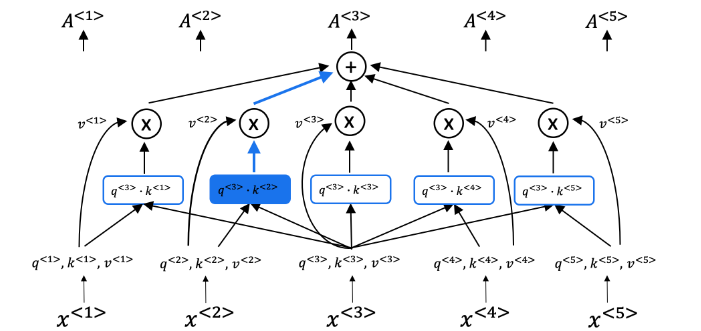 

**The scaled dot product attention function computes the attention weight for a sequence of queries (q), keys (k), and values (v). The attention weight measures how much focus should be given to each element in the sequence of values based on the corresponding element in the sequence of queries and keys. The function first computes the dot product between the query and key vectors, then scales the attention logits by dividing them by the square root of the depth of the key vectors. It then applies an optional mask to the attention logits and applies a softmax function to obtain the attention weights. Finally, it computes the weighted sum of the value vectors using the attention weights. The function returns the output and attention weights Attention can be represented by the following equation:**

$$\text { Attention }(Q, K, V)=\operatorname{softmax}\left(\frac{Q K^{T}}{\sqrt{d_{k}}}+{M}\right) V\$$



In [18]:
def scaled_dot_product_attention(q, k, v, mask):
    """
    Computes the scaled dot product attention weight for the query (q), key (k), and value (v) vectors. 
    The attention weight is a measure of how much focus should be given to each element in the sequence of values (v) 
    based on the corresponding element in the sequence of queries (q) and keys (k).
    
    Args:
    q: query vectors; shape (..., seq_len_q, depth)
    k: key vectors; shape  (..., seq_len_k, depth)
    v: value vectors; shape  (..., seq_len_v, depth_v)
    mask: (optional) mask to be applied to the attention weights
    
    Returns:
    output: The output of the scaled dot product attention computation; shape   (..., seq_len_q, depth_v)
    attention_weights: The attention weights
    """
    # Compute dot product of query and key vectors
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    
    # Compute the square root of the depth of the key vectors
    dk = tf.cast(tf.shape(k)[-1], dtype=tf.float32)
    scaled_dk = tf.math.sqrt(dk)
    
    # Compute scaled attention logits by dividing dot product by scaled dk
    scaled_attention_logits = matmul_qk / scaled_dk
    
    # Apply mask to the attention logits (if mask is not None)
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
        
    # Apply softmax to the scaled attention logits to get the attention weights
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    
    # Compute the weighted sum of the value vectors using the attention weights
    output = tf.matmul(attention_weights, v)
    
    return output, attention_weights



## MultiHeadAttention <a name="4-1"></a>
**The scaled dot product attention is a powerful mechanism that enables a neural network to selectively focus on relevant parts of a sequence when performing tasks such as language translation or image captioning. However, in many cases, there may be multiple aspects or features that an input element wants to attend to, and a single weighted average is not a sufficient way to capture this information. To address this, we can extend the attention mechanism to multiple heads.**


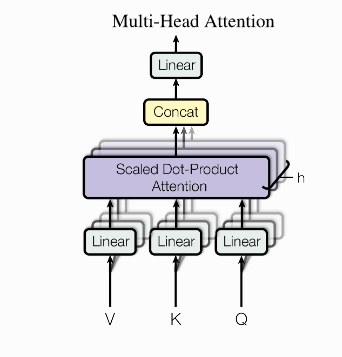

**The idea behind multi-head attention is to perform several different attention operations in parallel, with each attention head focusing on a different aspect of the input sequence. In other words, instead of a single query-key-value triplet, we use multiple such triplets in parallel, each one focusing on a different aspect of the input sequence.**

**To achieve this, we first split the query, key, and value matrices into several submatrices, each of which represents a different aspect of the input sequence. Then, for each submatrix, we apply the scaled dot product attention mechanism independently. This results in several different attention outputs, each one representing a different aspect of the input sequence.
**
**Finally, we concatenate the attention outputs and apply a linear transformation using a weight matrix to obtain a combined output. This combined output represents the final attention output that captures all the relevant aspects of the input sequence.**

**Mathematically, we can express the multi-head attention operation as a matrix operation involving the query, key, and value matrices, as well as a set of learnable weight matrices used to combine the attention outputs.**

In [19]:
class MultiHeadAttention(tf.keras.layers.Layer):
    """
    MultiHeadAttention Layer that implements the attention mechanism for the Transformer.
    It splits the input into multiple heads, computes scaled dot-product attention for each head
    and then concatenates the output of the heads and passes it through a dense layer.
    """

    def __init__(self, key_dim, num_heads, dropout_rate=0.0):
        """
        Initializes the MultiHeadAttention layer.
    
        Args:
            key_dim (int): The dimensionality of the key space.
            num_heads (int): The number of attention heads.
            dropout (float): The dropout rate to apply after the dense layer.
        """
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        #  ensure  that the dimension of the embedding can be evenly split across attention heads
        assert key_dim % num_heads == 0 
        self.depth = self.key_dim // self.num_heads
        
        # dense layers to project the input into queries, keys and values
        self.wq = Dense(key_dim)
        self.wk = Dense(key_dim)
        self.wv = Dense(key_dim)
    
        # dropout layer
        self.dropout = Dropout(dropout_rate)
    
        # dense layer to project the output of the attention heads
        self.dense = Dense(key_dim)
        
    def split_heads(self, x, batch_size):
        """
        Splits the last dimension of the tensor into (num_heads, depth).
        Transposes the result such that the shape is (batch_size, num_heads, seq_len, depth).
    
        Args:
            x (tensor): The tensor to be split.
            batch_size (int): The size of the batch.
    
        Returns:
            tensor: The tensor with the last dimension split into (num_heads, depth) and transposed.
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
        
    def call(self, v, k, q, mask=None):
        """
        Applies the multi-head attention mechanism to the inputs.
    
        Args:
            v (tensor): The value tensor of shape (batch_size, seq_len_v, key_dim).
            k (tensor): The key tensor of shape (batch_size, seq_len_k, key_dim).
            q (tensor): The query tensor of shape (batch_size, seq_len_q, key_dim).
            mask (tensor, optional): The mask tensor of shape (batch_size, seq_len_q, seq_len_k).
                                     Defaults to None.
    
        Returns:
            tensor: The output tensor of shape (batch_size, seq_len_q, key_dim).
            tensor: The attention weights tensor of shape (batch_size, num_heads, seq_len_q, seq_len_k).
        """
        batch_size = tf.shape(q)[0]
        
        # Dense on the q, k, v vectors
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        
        # split the heads
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        
        # split the queries, keys and values into multiple heads
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        
        # reshape and add Dense layer
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.key_dim))
        output = self.dense(concat_attention)
        output = self.dropout(output)
        
        return output, attention_weights
    

## Fully Connected NeuralNetwork <a name="4-3"></a>

In [20]:
def FeedForward(embedding_dim, fully_connected_dim):
    """Create a fully connected feedforward neural network.
    
    Args:
        embedding_dim (int): Dimensionality of the embedding output from the transformer layer.
        fully_connected_dim (int): Number of neurons in the fully connected layers.
    
    Returns:
        tf.keras.Sequential: A fully connected feedforward neural network with the specified architecture.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(fully_connected_dim, activation='relu'),
        tf.keras.layers.Dense(embedding_dim)
    ])
    return model


## Encoder <a name="4-4"></a>

**The Encoder consists of a stack of identical layers, where each layer has two sub-layers: a multi-head self-attention mechanism and a position-wise fully connected feedforward network.**

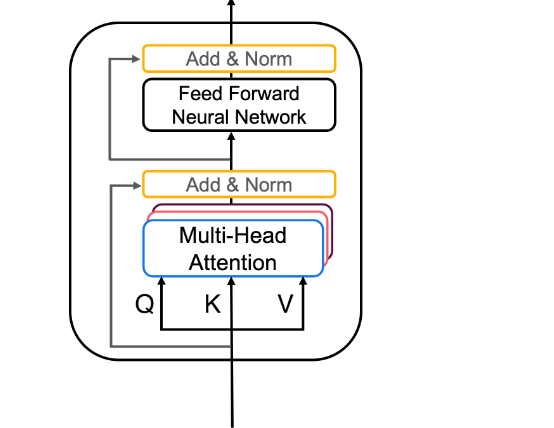

**In the self-attention mechanism, the Encoder attends to all positions of the input sequence to compute a weighted sum of the values at each position, where the weights are determined by the similarity between the query and key vectors for each position. This allows the Encoder to capture dependencies between all positions of the input sequence in parallel, and to assign more weight to the positions that are most relevant to the current position.**

**The fully connected feedforward network consists of two linear transformations with a ReLU activation function in between, which is applied to each position in the sequence independently. This allows the Encoder to learn non-linear relationships between the hidden states at different positions of the sequence.**

**In addition to the sub-layers, each layer in the Encoder also has residual connections and layer normalization, which help to mitigate the vanishing gradient problem and improve training stability.**

**The residual connection allows the output of the sub-layer to be added to the original input sequence, which preserves information from the input sequence and helps to propagate gradients through the network. The layer normalization normalizes the output of the sub-layer with respect to the mean and variance of the hidden states, which helps to reduce the effects of covariate shift and improve convergence.**

**The output of the Encoder is a sequence of hidden states that contains information about the context of each input token. This sequence is then passed to the Transformer Decoder for further processing, where it is used to generate an output sequence.**


In [21]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1):
        """Initializes the encoder layer
        
        Args: 
            embedding_dim: The dimensionality of the input and output of this layer
            num_heads: The number of attention heads to use in the multi-head attention layer
            fully_connected_dim: The dimensionality of the hidden layer in the feedforward network
            dropout_rate: The rate of dropout to apply to the output of this layer during training
            
        Returns:
            A new instance of the EncoderLayer class
        """
        super(EncoderLayer, self).__init__()
        
        # Multi-head self-attention mechanism
        self.mha = MultiHeadAttention(embedding_dim, num_heads, dropout_rate)
        
        # Layer normalization
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        
        # Dropout
        self.dropout = Dropout(dropout_rate)
        
        # Feedforward network
        self.ffn = FeedForward(embedding_dim, fully_connected_dim)
        
    def call(self, x, training, mask):
        """Applies the encoder layer to the input tensor
        
        Args:
            x: The input tensor to the encoder layer
            training: A boolean indicating whether the model is in training mode
            mask: A tensor representing the mask to apply to the attention mechanism
            
        Returns:
            The output of the encoder layer after applying the multi-head attention and feedforward network
        """
        
        # Apply multi-head self-attention mechanism to input tensor
        attn_output, _ = self.mha(x, x, x, mask)
        
        # Apply first layer normalization and add residual connection
        out1 = self.layernorm1(attn_output + x)
        
        # Apply feedforward network to output of first layer normalization
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout(ffn_output, training=training)
        
        # Apply second layer normalization and add residual connection
        out2 = self.layernorm2(ffn_output + out1)
        
        return out2

In [22]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, maximum_position_encoding, dropout_rate=0.1):
        """
        Initializes the Encoder layer of the Transformer model.
        
        Args:
            num_layers (int): Number of EncoderLayers to stack.
            embedding_dim (int): Dimensionality of the token embedding space.
            num_heads (int): Number of attention heads to use in MultiHeadAttention layers.
            fully_connected_dim (int): Dimensionality of the fully connected layer in the EncoderLayer.
            input_vocab_size (int): Size of the input vocabulary.
            maximum_position_encoding (int): Maximum length of input sequences for positional encoding.
            dropout_rate (float): Probability of dropping out units during training.

        """
        super(Encoder, self).__init__()
        
        self.num_layers = num_layers
        self.embedding_dim = embedding_dim
        
        # Embedding layer
        self.embedding = Embedding(input_vocab_size, embedding_dim)
        
        # Positional encoding
        self.pos_encoding = positional_encoding(maximum_position_encoding, embedding_dim)
        
        # Encoder layers
        self.enc_layers = [EncoderLayer(embedding_dim, num_heads, fully_connected_dim, dropout_rate) for _ in range(num_layers)]
        
        # Dropout layer
        self.dropout = Dropout(dropout_rate)
        
    def call(self, inputs, training, mask):
        """
        Call function for the Encoder layer.
        
        Args:
            inputs: tensor of shape (batch_size, sequence_length) representing input sequences
            training: boolean indicating if the model is in training mode
            mask: tensor of shape (batch_size, sequence_length) representing the mask to apply to the input sequence

        Returns:
            A tensor of shape (batch_size, sequence_length, embedding_dim) representing the encoded sequence
        """

        # Get the sequence length
        seq_len = tf.shape(inputs)[1]

        # Embed the input sequence
        inputs = self.embedding(inputs)

        # Scale the embeddings by sqrt(embedding_dim)
        inputs *= tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))

        # Add positional encodings to the input sequence
        inputs += self.pos_encoding[:, :seq_len, :]

        # Apply dropout to the input sequence
        inputs = self.dropout(inputs, training=training)

        # Pass the input sequence through the encoder layers
        for i in range(self.num_layers):
            inputs = self.enc_layers[i](inputs, training, mask)

        # Return the encoded sequence
        return inputs

## Decoder <a name="4-5"></a>

**The decoder takes in the encoded input sequence along with the previous generated output sequence. The output sequence is first passed through an embedding layer, which maps each token to a high-dimensional vector space. The embedding output is then added with a positional encoding, which allows the model to encode the sequential order of the input/output sequence. The positional encoding is added to the embeddings through a simple addition operation.**
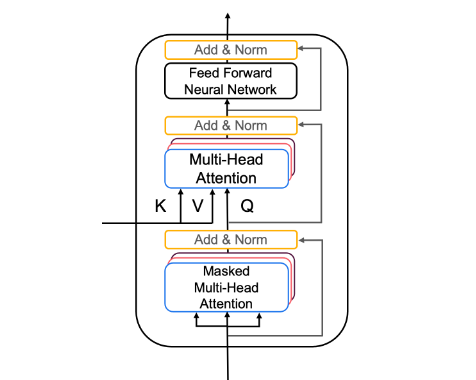

**Next, the decoder applies a multi-head self-attention mechanism similar to that of the encoder. However, the decoder also uses an additional masked self-attention mechanism, which prevents the decoder from attending to future tokens in the output sequence during training. This is because during training, the decoder is not yet aware of the future tokens and hence should not attend to them. During inference, the masked self-attention mechanism is not used as the model is generating the output sequence token by token, and hence it does not have access to the future tokens.**

**The decoder then applies a feedforward neural network to each position in the sequence. The output of the feedforward neural network is passed through a residual connection, followed by layer normalization. The residual connection allows the model to learn the difference between the input and output of the layer, while layer normalization helps to stabilize the training process.**

**The output of the decoder is then passed through a linear layer, which maps the high-dimensional vector space to the output vocabulary size. A softmax activation function is applied to the output to obtain the final probability distribution over the output vocabulary. The model then samples the token from this distribution and repeats the process until an end-of-sequence token is generated.**

In [23]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1):
        """
        Initializes a single decoder layer of the transformer model.
        
        Args:
        embedding_dim: The dimension of the embedding space.
        num_heads: The number of attention heads to use.
        fully_connected_dim: The dimension of the feedforward network.
        rate: The dropout rate for regularization.
        """
        super(DecoderLayer, self).__init__()
        
        # Instantiate two instances of MultiHeadAttention.
        self.mha1 = MultiHeadAttention(embedding_dim, num_heads, dropout_rate)
        self.mha2 = MultiHeadAttention(embedding_dim, num_heads, dropout_rate)
        
        # Instantiate a fully connected feedforward network.
        self.ffn = FeedForward(embedding_dim, fully_connected_dim)
        
        # Instantiate three layer normalization layers with epsilon=1e-6.
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.layernorm3 = LayerNormalization(epsilon=1e-6)
        
        # Instantiate a dropout layer for regularization.
        self.dropout3 = Dropout(dropout_rate)
        
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        """
        Forward pass through the decoder layer.
        
        Args:
        x: The input to the decoder layer, a query vector.
        enc_output: The output from the top layer of the encoder, a set of attention vectors k and v.
        training: Whether to apply dropout regularization.
        look_ahead_mask: The mask to apply to the input sequence so that it can't look ahead to future positions.
        padding_mask: The mask to apply to the input sequence to ignore padding tokens.
        
        Returns:
        The output from the decoder layer, a tensor with the same shape as the input.
        The attention weights from the first multi-head attention layer.
        The attention weights from the second multi-head attention layer.
        """
        
        # Apply the first multi-head attention layer to the query vector x.
        # We pass x as all three inputs to the layer because this is a self-attention layer.
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        
        # Add the original input to the output of the attention layer and apply layer normalization.
        out1 = self.layernorm1(attn1 + x) 
        
        # Apply the second multi-head attention layer to the output from the first layer and the encoder output.
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        
        # Add the output from the first layer to the output of the second layer and apply layer normalization.
        out2 = self.layernorm2(attn2 + out1)
        
        # Apply the feedforward network to the output of the second layer and apply dropout regularization.
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        
        # Add the output from the second layer to the output of the feedforward network and apply layer normalization.
        out3 = self.layernorm3(ffn_output + out2)
        
        return out3, attn_weights_block1, attn_weights_block2


In [24]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, target_vocab_size, maximum_position_encoding, dropout_rate=0.1):
        """
        Initializes the Decoder object.
        
        Args:
            num_layers (int): The number of Decoder layers.
            embedding_dim (int): The size of the embedding dimension.
            num_heads (int): The number of heads in the MultiHeadAttention layer.
            fully_connected_dim (int): The number of units in the feedforward network.
            target_vocab_size (int): The number of words in the target vocabulary.
            maximum_position_encoding (int): The maximum length of a sequence.
            dropout_rate (float): The rate at which to apply dropout.
        """
        super(Decoder, self).__init__()
        
        self.num_layers = num_layers
        self.embedding_dim = embedding_dim
        
        # create layers
        self.embedding = Embedding(target_vocab_size, embedding_dim)
        self.pos_encoding = positional_encoding(maximum_position_encoding, embedding_dim)
        self.dec_layers = [DecoderLayer(embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1) for _ in range(num_layers)]
        self.dropout = Dropout(dropout_rate)
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        """
        Executes the Decoder.

        Args:
            x (tf.Tensor): The input to the Decoder.
            enc_output (tf.Tensor): The output from the Encoder.
            training (bool): Whether the Decoder is in training mode.
            look_ahead_mask (tf.Tensor): The mask for self-attention in the MultiHeadAttention layer.
            padding_mask (tf.Tensor): The mask for padding in the MultiHeadAttention layer.

        Returns:
            tf.Tensor: The output from the Decoder.
            dict: A dictionary of attention weights.
        """
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        # add embedding and positional encoding
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)

        # apply each layer of the decoder
        for i in range(self.num_layers):
            # pass through decoder layer i
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            # record attention weights for block1 and block2
            attention_weights[f"decoder_layer{i + 1}_block1"] = block1
            attention_weights[f"decoder_layer{i + 1}_block2"] = block2

        return x, attention_weights

## Transformer <a name="4-6"></a>

**The Transformer is composed of two main components: the encoder and the decoder. The encoder takes an input sequence and produces a sequence of hidden representations, while the decoder takes this sequence of hidden representations and generates an output sequence. Both the encoder and decoder are composed of several layers of multi-headed self-attention and point-wise feed-forward neural networks.**

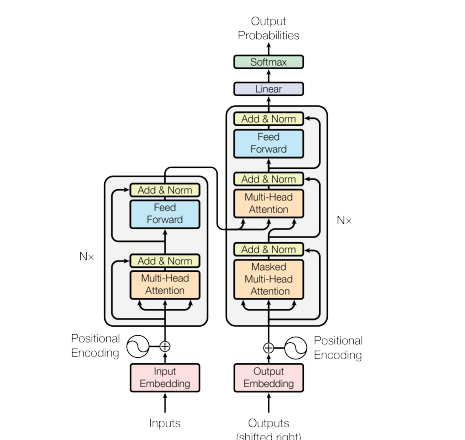 



In [25]:
class Transformer(tf.keras.Model):
    """
    A Transformer model that takes in an input and target sequence and outputs a final prediction.

    Args:
        num_layers (int): Number of layers in the Encoder and Decoder.
        embedding_dim (int): Dimensionality of the embedding layer.
        num_heads (int): Number of attention heads used in the Transformer.
        fully_connected_dim (int): Dimensionality of the fully connected layer in the Encoder and Decoder.
        input_vocab_size (int): Size of the input vocabulary.
        target_vocab_size (int): Size of the target vocabulary.
        max_positional_encoding_input (int): Maximum length of the input sequence.
        max_positional_encoding_target (int): Maximum length of the target sequence.
        dropout_rate (float, optional): Dropout rate used in the Encoder and Decoder layers. Defaults to 0.1.
    """
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, target_vocab_size, max_positional_encoding_input, max_positional_encoding_target, dropout_rate=0.1):
        super(Transformer, self).__init__()
        
        # Initialize the Encoder and Decoder layers
        self.encoder = Encoder(num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, max_positional_encoding_input, dropout_rate)
        self.decoder = Decoder(num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, max_positional_encoding_target, dropout_rate)
        
        # Add a final dense layer to make the final prediction
        self.final_layer = tf.keras.layers.Dense(target_vocab_size, activation='softmax')
        
    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        """
        Perform a forward pass through the Transformer model.

        Args:
            inp (tf.Tensor): Input sequence tensor with shape (batch_size, input_seq_len).
            tar (tf.Tensor): Target sequence tensor with shape (batch_size, target_seq_len).
            training (bool): Whether the model is being trained or not.
            enc_padding_mask (tf.Tensor): Padding mask for the Encoder with shape (batch_size, 1, 1, input_seq_len).
            look_ahead_mask (tf.Tensor): Mask to prevent the Decoder from looking ahead in the target sequence with shape (batch_size, 1, target_seq_len, target_seq_len).
            dec_padding_mask (tf.Tensor): Padding mask for the Decoder with shape (batch_size, 1, 1, target_seq_len).

        Returns:
            tuple: A tuple containing the final output of the model and the attention weights of the Decoder.
        """
        # Pass the input sequence through the Encoder
        enc_output = self.encoder(inp, training, enc_padding_mask)
        
        # Pass the target sequence and the output of the Encoder through the Decoder
        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)
        
        # Pass the output of the Decoder through the final dense layer to get the final prediction
        final_output = self.final_layer(dec_output)
        
        return final_output, attention_weights


<a id="5"></a>
<h1 style='background:#FF9F00;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #3E3D53;'>Training</center></h1>
    
# Training

## Initializing Hyperparameters <a name="5-1"></a>

In [26]:
# Set hyperparameters for the Transformer model
embedding_dim = 256  # dimensionality of the embeddings used for tokens in the input and target sequences
fully_connected_dim = 512  # dimensionality of the hidden layer of the feedforward neural network within the Transformer block
num_layers = 4  # number of Transformer blocks in the encoder and decoder stacks
num_heads = 8  # number of heads in the multi-head attention mechanism
dropout_rate = 0.1  # dropout rate for regularization

# Set vocabulary sizes for input and target sequences
input_vocab_size = len(tokenizer_fr.word_index) + 2  # add 2 for the start and end tokens
target_vocab_size = len(tokenizer_en.word_index) + 2  # add 2 for the start and end tokens

# Set maximum positional encoding values for input and target sequences
max_positional_encoding_input = input_vocab_size  # maximum positional encoding value for input sequence
max_positional_encoding_target = target_vocab_size  # maximum positional encoding value for target sequence

# Set the number of epochs and batch size for training
EPOCHS = 10
batch_size = 64


## Learning Rate Scheduler <a name="5-2"></a>

**The CustomSchedule class is a learning rate schedule that uses a combination of a square root inverse decay and a warmup schedule to adjust the learning rate over time during training. The learning rate determines how much the model should update its parameters during each iteration of training.**


**During training, the call method of the CustomSchedule class is called on each training step. This method takes the current step number as an argument and returns the learning rate value at that step. The learning rate value is computed using a combination of a square root inverse decay and a warmup schedule.**

**The square root inverse decay schedule decreases the learning rate at each step using a reciprocal square root function. The warmup schedule gradually increases the learning rate from 0 to the initial learning rate over the specified number of warmup steps.**


\begin{equation}
    LR(step) = \sqrt{d_{}} \cdot \min\left(\frac{1}{\sqrt{step}}, \frac{step}{\sqrt{warmup\_steps^3}}\right)
\end{equation}

where:

$d$ is the embedding dimension

$\text{step}$ is the current step number

$\text{warmup_steps}$ is the number of warmup steps.


In [27]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    """
    A custom learning rate schedule that uses a combination of
    a square root inverse decay and a warmup schedule.

    Args:
        embedding_dim (int): The dimension of the embedding.
        warmup_steps (int): The number of steps used for warmup.

    Returns:
        float: The learning rate value at a given step.
    """
    def __init__(self, embedding_dim, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.embedding_dim = tf.cast(embedding_dim, dtype=tf.float32)
        self.warmup_steps = tf.cast(warmup_steps, dtype=tf.float32)

    def __call__(self, step):
        """
        Compute the learning rate value for a given step using
        a combination of square root inverse decay and warmup.

        Args:
            step (int): The current step number.

        Returns:
            float: The learning rate value at the current step.
        """
        step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.embedding_dim) * tf.math.minimum(arg1, arg2)

# Create an instance of the custom learning rate schedule
learning_rate = CustomSchedule(embedding_dim)


## Loss Function and Metrics <a name="5-3"></a>

**The Adam optimizer is used to update the weights of the model during training. The learning rate used by the optimizer is controlled by a custom learning rate schedule defined earlier in the code.**

**The loss function used to train the model is the SparseCategoricalCrossentropy. This is a commonly used loss function for classification problems. It measures the difference between the predicted target sequence and the true target sequence. The loss function is computed using the cross-entropy formula, which is given by:**

$-\sum_{i=1}^{n} y_i \log(p_i)$

**where $n$ is the number of classes, $y_i$ is the true label of the $i$-th class, and $p_i$ is the predicted probability of the $i$-th class. The loss function is applied to each time step of the predicted target sequence, and then averaged over all time steps to obtain a single loss value for the entire sequence.**
**

**The training accuracy is measured using the SparseCategoricalAccuracy metric, which is a standard metric used for classification problems. It computes the accuracy of the predicted target sequence by comparing it with the true target sequence. The metric is calculated by counting the number of correct predictions and dividing it by the total number of predictions.**

**During training, the loss and accuracy are updated at each step using the tf.keras.metrics.Mean and tf.keras.metrics.SparseCategoricalAccuracy classes, respectively. These metrics are used to monitor the training progress and evaluate the performance of the model.**

In [28]:
# Create an instance of the Transformer model
transformer = Transformer(num_layers, embedding_dim, num_heads,
                           fully_connected_dim, input_vocab_size, target_vocab_size, 
                           max_positional_encoding_input, max_positional_encoding_target, dropout_rate)

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2 = 0.98, epsilon = 1e-9)

# Define the loss object
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()


def loss_function(true_values, predictions):
    """
    Calculate the loss value for a given target sequence.

    Args:
        true_values (tf.Tensor): The true target sequence.
        predictions (tf.Tensor): The predicted target sequence.

    Returns:
        float: The loss value for the given target sequence.
    """
    # Create a mask to exclude the padding tokens
    mask = tf.math.logical_not(tf.math.equal(true_values, 0))

    # Compute the loss value using the loss object
    loss_ = loss_object(true_values, predictions)

    # Apply the mask to exclude the padding tokens
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    # Calculate the mean loss value
    return tf.reduce_sum(loss_) / tf.reduce_sum(mask)

def accuracy_function(true_values, predictions):
    """
    Calculate the accuracy for a given target sequence.

    Args:
        true_values (tf.Tensor): The true target sequence.
        predictions (tf.Tensor): The predicted target sequence.

    Returns:
        float: The accuracy value for the given target sequence.
    """
    # Compute the accuracies using the true and predicted target sequences
    accuracies = tf.equal(true_values, tf.argmax(predictions, axis=2))

    # Create a mask to exclude the padding tokens
    mask = tf.math.logical_not(tf.math.equal(true_values, 0))

    # Apply the mask to exclude the padding tokens from the accuracies
    accuracies = tf.math.logical_and(mask, accuracies)
    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)

    # Calculate the mean accuracy value
    return tf.reduce_sum(accuracies) / tf.reduce_sum(mask)

# Define the training metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

## Training Function <a name="5-4"></a>
**Using the transformer model, the input and masks are passed through a forward pass to generate predictions. These predictions are then compared to the expected output to calculate the loss. The gradients of the loss with respect to the trainable variables of the transformer model are computed using tf.GradientTape(), and the optimizer is applied to update the model parameters.**

**Finally, the training loss and accuracy metrics are updated using the train_loss and train_accuracy functions**

In [29]:

# the train function
train_step_signature = [
    tf.TensorSpec(shape=(batch_size, 30), dtype=tf.int64),
    tf.TensorSpec(shape=(batch_size,30), dtype=tf.int64),
]


@tf.function(input_signature=train_step_signature)
def train_step(encoder_input, target):
    """
    Function to perform a single training step.

    Args:
    encoder_input (tf.Tensor): The input tensor for the encoder.
    target (tf.Tensor): The target tensor for the decoder.

    Returns:
    None.
    """

    # Slice the target tensor to get the input for the decoder
    decoder_input = target[:, :-1]

    # Slice the target tensor to get the expected output of the decoder
    expected_output = target[:, 1:]

    # Create masks for the encoder input, decoder input and the padding
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, decoder_input)

    # Perform a forward pass through the model
    with tf.GradientTape() as tape:
        predictions, _ = transformer(encoder_input, decoder_input, True, enc_padding_mask, combined_mask, dec_padding_mask)

        # Calculate the loss between the predicted output and the expected output
        loss = loss_function(expected_output, predictions)

    # Calculate gradients and update the model parameters
    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    # Update the training loss and accuracy metrics
    train_loss(loss)
    train_accuracy(expected_output, predictions)



## Training Loop <a name="5-5"></a>

**This is the training loop where the model is trained on the input and target batches in iterations.**

**The loop starts by resetting the training metrics at the start of each epoch. Then, it iterates through the dataset in batches of size batch_size. At each iteration, it gets the input and target batch and calls the train_step function to train the model on the current batch.**

**The training metrics (loss and accuracy) are updated at each iteration using the train_loss and train_accuracy objects. These metrics are printed every 100 batches to monitor the training progress.**

**Finally, after iterating through the dataset, the epoch loss and accuracy are printed.**

In [30]:
for epoch in range(1, EPOCHS+1):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    current_batch_index = 0

    # iterate through the dataset in batches of batch_size
    for i in range(int(len(english_sentences)/batch_size)):
        # get the input and target batch
        target_batch = tf.convert_to_tensor(np.array(english_sentences[current_batch_index:current_batch_index+batch_size]),dtype=tf.int64)
        input_batch = tf.convert_to_tensor(np.array(french_sentences[current_batch_index:current_batch_index+batch_size]),dtype=tf.int64)

        current_batch_index = current_batch_index + batch_size
        # call the train_step function to train the model using the current batch
        train_step(input_batch, target_batch)

    # print the epoch loss and accuracy after iterating through the dataset
    print (f'Epoch {epoch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}') 

 

Epoch 1 Loss 0.2599 Accuracy 0.9511
Epoch 2 Loss 0.0170 Accuracy 0.9926
Epoch 3 Loss 0.0170 Accuracy 0.9926
Epoch 4 Loss 0.0142 Accuracy 0.9932
Epoch 5 Loss 0.0128 Accuracy 0.9935
Epoch 6 Loss 0.0120 Accuracy 0.9937
Epoch 7 Loss 0.0110 Accuracy 0.9940
Epoch 8 Loss 0.0107 Accuracy 0.9941
Epoch 9 Loss 0.0103 Accuracy 0.9942
Epoch 10 Loss 0.0099 Accuracy 0.9943


<a id="6"></a>
<h1 style='background:#FF9F00;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #3E3D53;'>Evaluation</center></h1>
    
# Evaluation

## Translate Helper Function <a name="6-1"></a>

**This function takes source language sentence as input and generates a translated sentence in the target language.using the following steps:**

1.  The input sentence is preprocessed by adding start and end of sentence markers and converting it to a list because of TensorFlow's tokenizer.

2.  The preprocessed sentence is vectorized and padded to a fixed length of 30 using the target language tokenizer.

3. The start of the decoder input is tokenized and converted to a tensor using the target language tokenizer.

4. The function then enters a loop that generates predictions for the current input sequence, selects the last word from the seq_len dimension, gets the predicted word ID by taking the argmax of the predictions, concatenates the predicted ID to the output which is given to the decoder as its input, and checks if the predicted ID is equal to the end token. If the predicted ID is equal to the end token, the function returns the decoder input, otherwise the loop continues.

5. If the loop completes without finding the end token, the function returns the translated sentence.

In [31]:
maxlen = 30
def translate_helper(sentence):
    """
    Evaluate function that generates a translated sentence from the given input sentence.

    Args:
    sentence (str): The input sentence in the source language.

    Returns:
    A tensor representing the translated sentence.
    """
    
    # Preprocess the input sentence
    sentence = 'sos ' + sentence[0] + ' eos.' # Add start and end of sentence markers
    sentence = [sentence] # Convert sentence to list because of TensorFlow's tokenizer
    
    # Vectorize and pad the sentence
    sentence = tokenizer_fr.texts_to_sequences(sentence)
    sentence = pad_sequences(sentence, maxlen=30, padding='post', truncating='post')
    input = tf.convert_to_tensor(np.array(sentence),dtype=tf.int64) # Convert input to tensor
    
    # Tokenize the start of the decoder input and convert it to a tensor
    decoder_input = tokenizer_en.texts_to_sequences(['sos'])
    decoder_input = tf.convert_to_tensor(np.array(decoder_input), dtype=tf.int64)
    
    # Generate the translated sentence
    for i in range(maxlen):
        # Create masks for the encoder, decoder, and combined
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(input, decoder_input)
        # Generate predictions for the current input sequence
        predictions, _ = transformer(input, decoder_input,False,enc_padding_mask,combined_mask, dec_padding_mask)
        # Select the last word from the seq_len dimension
        predictions = predictions[: ,-1:, :] 
        # Get the predicted word ID by taking the argmax of the predictions
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int64)
        
        # If the predicted ID is equal to the end token, return the decoder input
        if predicted_id == tokenizer_en.texts_to_sequences(['eos']):
            return tf.squeeze(decoder_input, axis=0)
        
        # Concatenate the predicted ID to the output which is given to the decoder
        # as its input.
        decoder_input = tf.concat([decoder_input, predicted_id], axis=1)
    
    # Return the translated sentence
    return tf.squeeze(decoder_input, axis=0)


## Translate Function <a name="6-2"></a>

In [32]:
def translate(sentence):
    """
    Translate function that generates a translation for the given input sentence.

    Args:
    sentence (str): The input sentence in the source language.

    Returns:
    None.
    """
    
    # Convert sentence to list because our evaluate function requires lists
    sentence = [sentence]
    
    # Print the input sentence
    print(f'Input sentence: {sentence[0]}')
    print()
    
    # Generate the translated sentence
    result = (translate_helper(sentence)).tolist()
    
    # Convert the result tensor to a list of IDs and remove start and end of sentence markers
    predicted_ids = [i for i in result if i != tokenizer_en.texts_to_sequences(['sos'])[0][0]
                     and i != tokenizer_en.texts_to_sequences(['eos.'])[0][0]]
    
    # Convert the predicted IDs to a list of words
    predicted_sentence = tokenizer_en.sequences_to_texts([predicted_ids])
    
    # Print the predicted translation
    print(f'Translation: {predicted_sentence[0]}')
 


In [33]:
sentence = "new jersey est parfois calme pendant l' automne"
translate(sentence)

Input sentence: new jersey est parfois calme pendant l' automne

Translation: new jersey is sometimes quiet during fall


In [34]:
sentence = "california est généralement calme en mars"
translate(sentence)

Input sentence: california est généralement calme en mars

Translation: california is usually quiet during march


<a id="7"></a>
<h1 style='background:#FF9F00;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #3E3D53;'>Thank You and References</center></h1>
    
## Thank You  


**Thank you for going through this notebook**

**If you have any suggestions please let me know**


## References

1. https://arxiv.org/abs/1706.03762

2. [Deep Learning Specilization C5W4 Sequence Models](https://www.coursera.org/learn/nlp-sequence-models/home/week/4)

3. https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial6/Transformers_and_MHAttention.html